In [51]:
import numpy as np
import pandas as pd
import seaborn as sns

In [52]:
knn_naive = pd.read_csv("../results/output_places_US_knn_naive.csv")
# seacnn = pd.read_csv("../results/output_places_US_knn_seacnn.csv")
# seacnn['name'] = "SEA-CNN"
# seacnn_fixed = pd.read_csv("../results/output_places_US_knn_seacnn_fixed.csv")
# seacnn_fixed['name'] = "SEA-CNN"
# seacnn_fixed_v2 = pd.read_csv("../results/output_places_US_knn_seacnn_mem.csv")
# seacnn_fixed_v2['name'] = "Patial Desending SEA-CNN"

# knn = pd.read_csv("../results/output_places_US_knn_exp.csv")
# knn_obj = pd.read_csv("../results/output_places_US_knn_obj_exp.csv")
# knn_naive_obj = pd.read_csv("../results/output_places_US_knn_naive_obj_exp.csv")
knn2 = pd.read_csv("../results/output_places_US_knn_exp2.csv")
ckqst = pd.read_csv("../results/output_places_US_ckqst.csv")


res = pd.concat([
    knn_naive.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # seacnn.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # seacnn_fixed.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # knn.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # knn_obj.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    knn2.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])
res = res[res['name'].isin(['places_knn', 'diff_formula_NO', 'ckqst_NO'])]

name_map = {
    "places_knn": "Naive",
    "static_NO": "Decsending (Once)",
    "static_EXPIRE_KNN": "Expiring Decsending (Once)",
    "dynamic_NO": "Decsending (Continous)",
    "dynamic_v2_EXPIRE_KNN": "Expiring Decsending V2 (Continous)",
    "dynamic_v3_EXPIRE_KNN": "Expiring Decsending V3 (Continous)",
    "dynamic_v3_NO": "Decsending V3 (Continous)",
    "static_v2_NO": "Decsending V2 (Once)",
    "dynamic_v4_NO": "Decsending V4 (Continous)",
    "dynamic_v4_EXPIRE_KNN": "Expiring Decsending V4 (Continous)",
    "static_v3_NO": "Decsending V3 (Once)",
    "static_v4_NO": "Decsending V4 (Once)",
    "static_v5_NO": "Expiring Objects",
    "obj_expiring_NO": "Naive (Expiring Objects)",
    "expiring_NO": "Naive (v1)",
    "diff_formula_NO": "Ours",
    "diff_formula_v2_NO": "New Descending (w/ int + 1) (Once)",
    "diff_formula_v3_NO": "New Descending (w/ ceil) (Once)",
    "ori_formula_NO": "Old Descending (Once)",
    "ckqst_NO": "CkQST"
}
res['name'] = res['name'].apply(lambda x: name_map[x])

res

,creation_time,search_time,num_queries,name
0,172846812,12052553419,100000,Naive
1,490011624,92903556845,500000,Naive
2,901933066,198031281350,1000000,Naive
3,1940748131,419322909181,2500000,Naive
4,210519521,11660142249,100000,Naive
5,606187893,87374653715,500000,Naive
6,867310701,209452007862,1000000,Naive
7,2446234806,550983418726,2500000,Naive
8,295598693,8850511595,100000,Naive
9,442297750,72661776036,500000,Naive


In [53]:
# def expName(x):
#     if x == "places":
#         return "0% KNN Queries"
#     elif x == "places_knn_05":
#         return "5% KNN Queries"
#     elif x == "places_knn_10":
#         return "10% KNN Queries"

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Index creation time (sec)'>

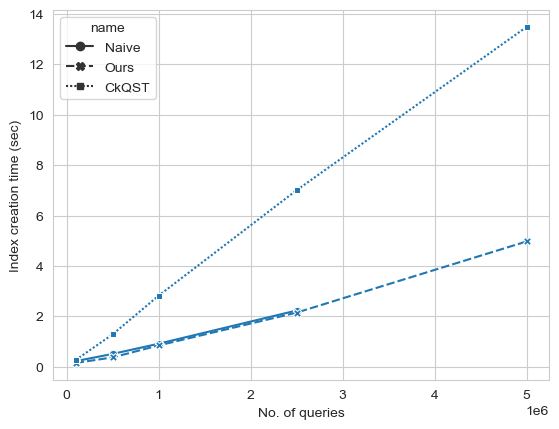

In [54]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [55]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
1,490011624,185807.113690,500000,Naive
5,606187893,174749.307430,500000,Naive
9,442297750,145323.552072,500000,Naive
46,377506385,37570.412378,500000,Ours
51,374363566,38326.880052,500000,Ours
56,371350454,35123.623312,500000,Ours
1,1334992089,41044.519268,500000,CkQST
6,1236309885,38867.941696,500000,CkQST


In [56]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
3,1940748131,419322909181,2500000,Naive
7,2446234806,550983418726,2500000,Naive
11,2320566598,613240169259,2500000,Naive
48,2200629648,112032843060,2500000,Ours
53,2102491498,114692388487,2500000,Ours
58,2151510270,110817147202,2500000,Ours
3,6854186497,130429818712,2500000,CkQST
8,7158337001,132310583259,2500000,CkQST


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Query Matching Time (nano sec)'>

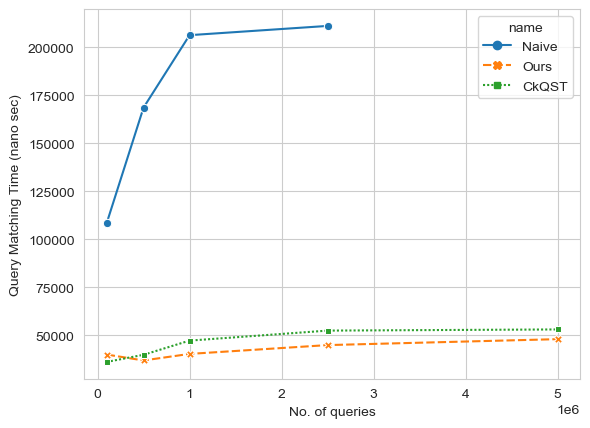

In [57]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (nano sec)'] = search_res['search_time'].apply(lambda x: x) / search_res['num_queries']
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (nano sec)', hue='name', style='name', data=search_res, errorbar=None, markers=True)

In [58]:
# Optimization
# - Custom iterator
# - Circle bound calculation